# Zero to Hero

## 1.02  Carga del dataset desde la nube y operaciones básicas

Se muestra una alternativa a cargar el dataset directamente desde la nube, que funciona desde Kaggle, Google Colab
<br>
Si se está corriendo desde la PC local, siempre es preferible cargar el archivo del disco local.

In [3]:
library("data.table") # cargo la libreria  data.table

"https://storage.googleapis.com/austral2022r/paquete_premium_202011.csv" está en el repositorio de la asignatura

In [4]:
dataset <- fread("https://storage.googleapis.com/austral2022r/paquete_premium_202011.csv")

Obviamente ahora el leer el archivo demora bastante, ya que se está bajando por internet, están viajando 117MB

### Ahora, algunas operaciones básicas con el dataset

cantidad de registros y columnas

In [5]:
nrow(dataset)
ncol(dataset)

[1] 159388

[1] 159

Otra forma de ver la cantidad de registros del dataset, al  *estilo data table*
<br>
El .N  es la cantidad de registros y va en la segunda poscion  dataset[ 1, 2, 3 ]

In [7]:
dataset[, .N]

[1] 159388

nombre de las columnas del dataset

Exploración de clase_ternaria.

In [11]:
dataset[, .N, by = clase_ternaria]

clase_ternaria,N
<chr>,<int>
CONTINUA,158229
BAJA+1,511
BAJA+2,648


###  varias formas de contar los BAJA+2

todas las formas dan el mismo resultado

In [12]:
nrow(dataset[clase_ternaria == "BAJA+2"])

[1] 648

In [13]:
dataset[clase_ternaria == "BAJA+2", .N] # el autentico estilo data.table

[1] 648

In [14]:
dataset[, sum(clase_ternaria == "BAJA+2")]

[1] 648

### Conteo de proporcion de BAJA+2 en el dataset

In [17]:
dataset[, sum(clase_ternaria == "BAJA+2") / .N]
dataset[clase_ternaria == "BAJA+2", .N / dataset[, .N]]

[1] 0.004065551

[1] 0.004065551

Conteo de la proporcion de BAJA+2 en un predicado

In [18]:
dataset[ctrx_quarter < 20, sum(clase_ternaria == "BAJA+2") / .N]

[1] 0.02610297

### Ganancias del dataset

Agregado de la columna ganancia al dataset

Primero le asigno a TODOS los registros el valor de  -1000
<br>
la asignacion se hace con el  :=

In [19]:
dataset[, ganancia := -1000]

y finalmente a los  BAJA+2 les asigno 59000

In [20]:
dataset[clase_ternaria == "BAJA+2", ganancia := 59000]

Calculo la ganancia que tendria una campaña en donde envío estímulo a TODOS los clientes

In [22]:
dataset[, sum(ganancia)]

[1] -120508000

Si le enviara estímulo a todos, se **pierden**  120.5 millones de pesos

### Ganancias de predicados univariados

Calculo la ganancia de un predicado simple
ctrx_quarter < 20

In [23]:
dataset[ctrx_quarter < 10, sum(ganancia)]

[1] 6104000

Ahora  la ganancia de  *ctrx_quarter < 4*

In [24]:
dataset[ctrx_quarter < 4, sum(ganancia)]

[1] 4548000

Ahora, en forma brutal e ineficiente, busco donde esta el mejor corte de  ctrx_quarter
<br>
Ya resolveremos esto en forma inteligente más adelante

In [25]:
for (transacciones in 0:50) {
   cat(transacciones, dataset[ctrx_quarter < transacciones, sum(ganancia)], "\n")
}

0 0 
1 3252000 
2 3857000 
3 4149000 
4 4548000 
5 4842000 
6 5234000 
7 5640000 
8 5713000 
9 6016000 
10 6104000 
11 6506000 
12 6576000 
13 6738000 
14 6632000 
15 6493000 
16 6257000 
17 6199000 
18 6667000 
19 6880000 
20 7071000 
21 6949000 
22 6588000 
23 6605000 
24 6384000 
25 6447000 
26 6191000 
27 6059000 
28 5724000 
29 5377000 
30 5229000 
31 5016000 
32 4697000 
33 4105000 
34 3677000 
35 3153000 
36 2604000 
37 2081000 
38 1499000 
39 836000 
40 579000 
41 134000 
42 -615000 
43 -1119000 
44 -1748000 
45 -2503000 
46 -3157000 
47 -3804000 
48 -4546000 
49 -5208000 
50 -5687000 


Observo que el predicado  ctrx_quarter < 20 tiene la máxima ganancia

### Ganancias de predicado complejo

In [26]:
dataset[ctrx_quarter < 20 & mpasivos_margen < 29.8, sum(ganancia)]

[1] 7179000

Enhorabuena ! hemos alcanzado los 7.18 M de ganancia

### gráficos de densidades

Visualización de la densidad de una variable versus clase_ternaria

In [27]:
library("ggplot2") #cargo la libreria ggplot2

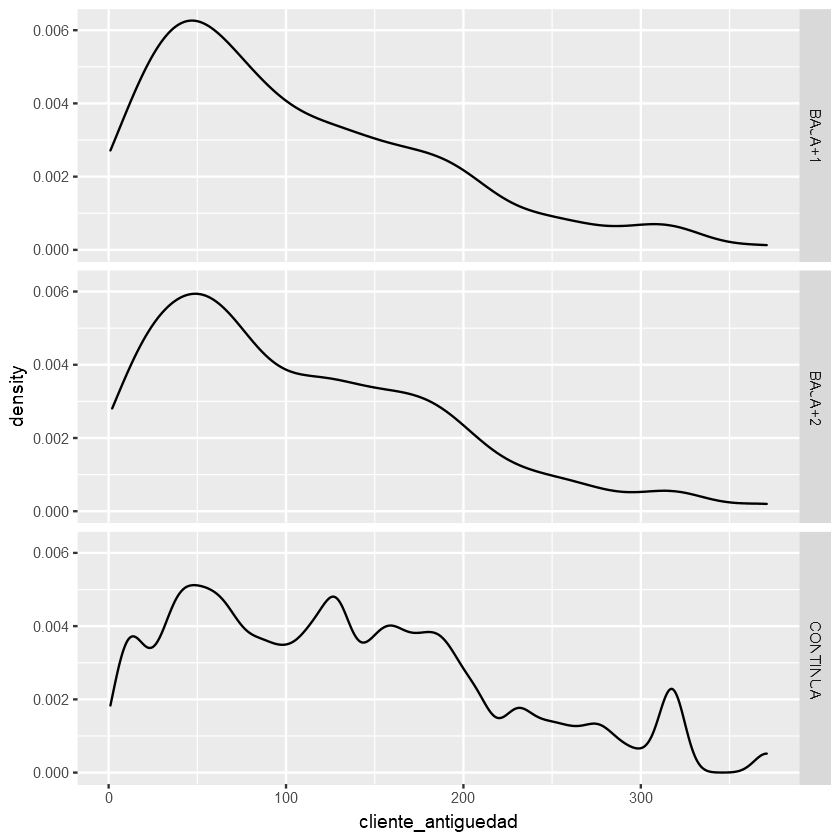

In [28]:
campo <- "cliente_antiguedad"
ggplot(dataset, aes_string(x = campo)) +
    geom_density(trim = TRUE, na.rm = TRUE) +
    facet_grid("clase_ternaria~ .")

los gráficos salen muy pequeños, busco la documentacion https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html  y agrando los graficos

In [29]:
options(repr.plot.width = 15, repr.plot.height = 15)

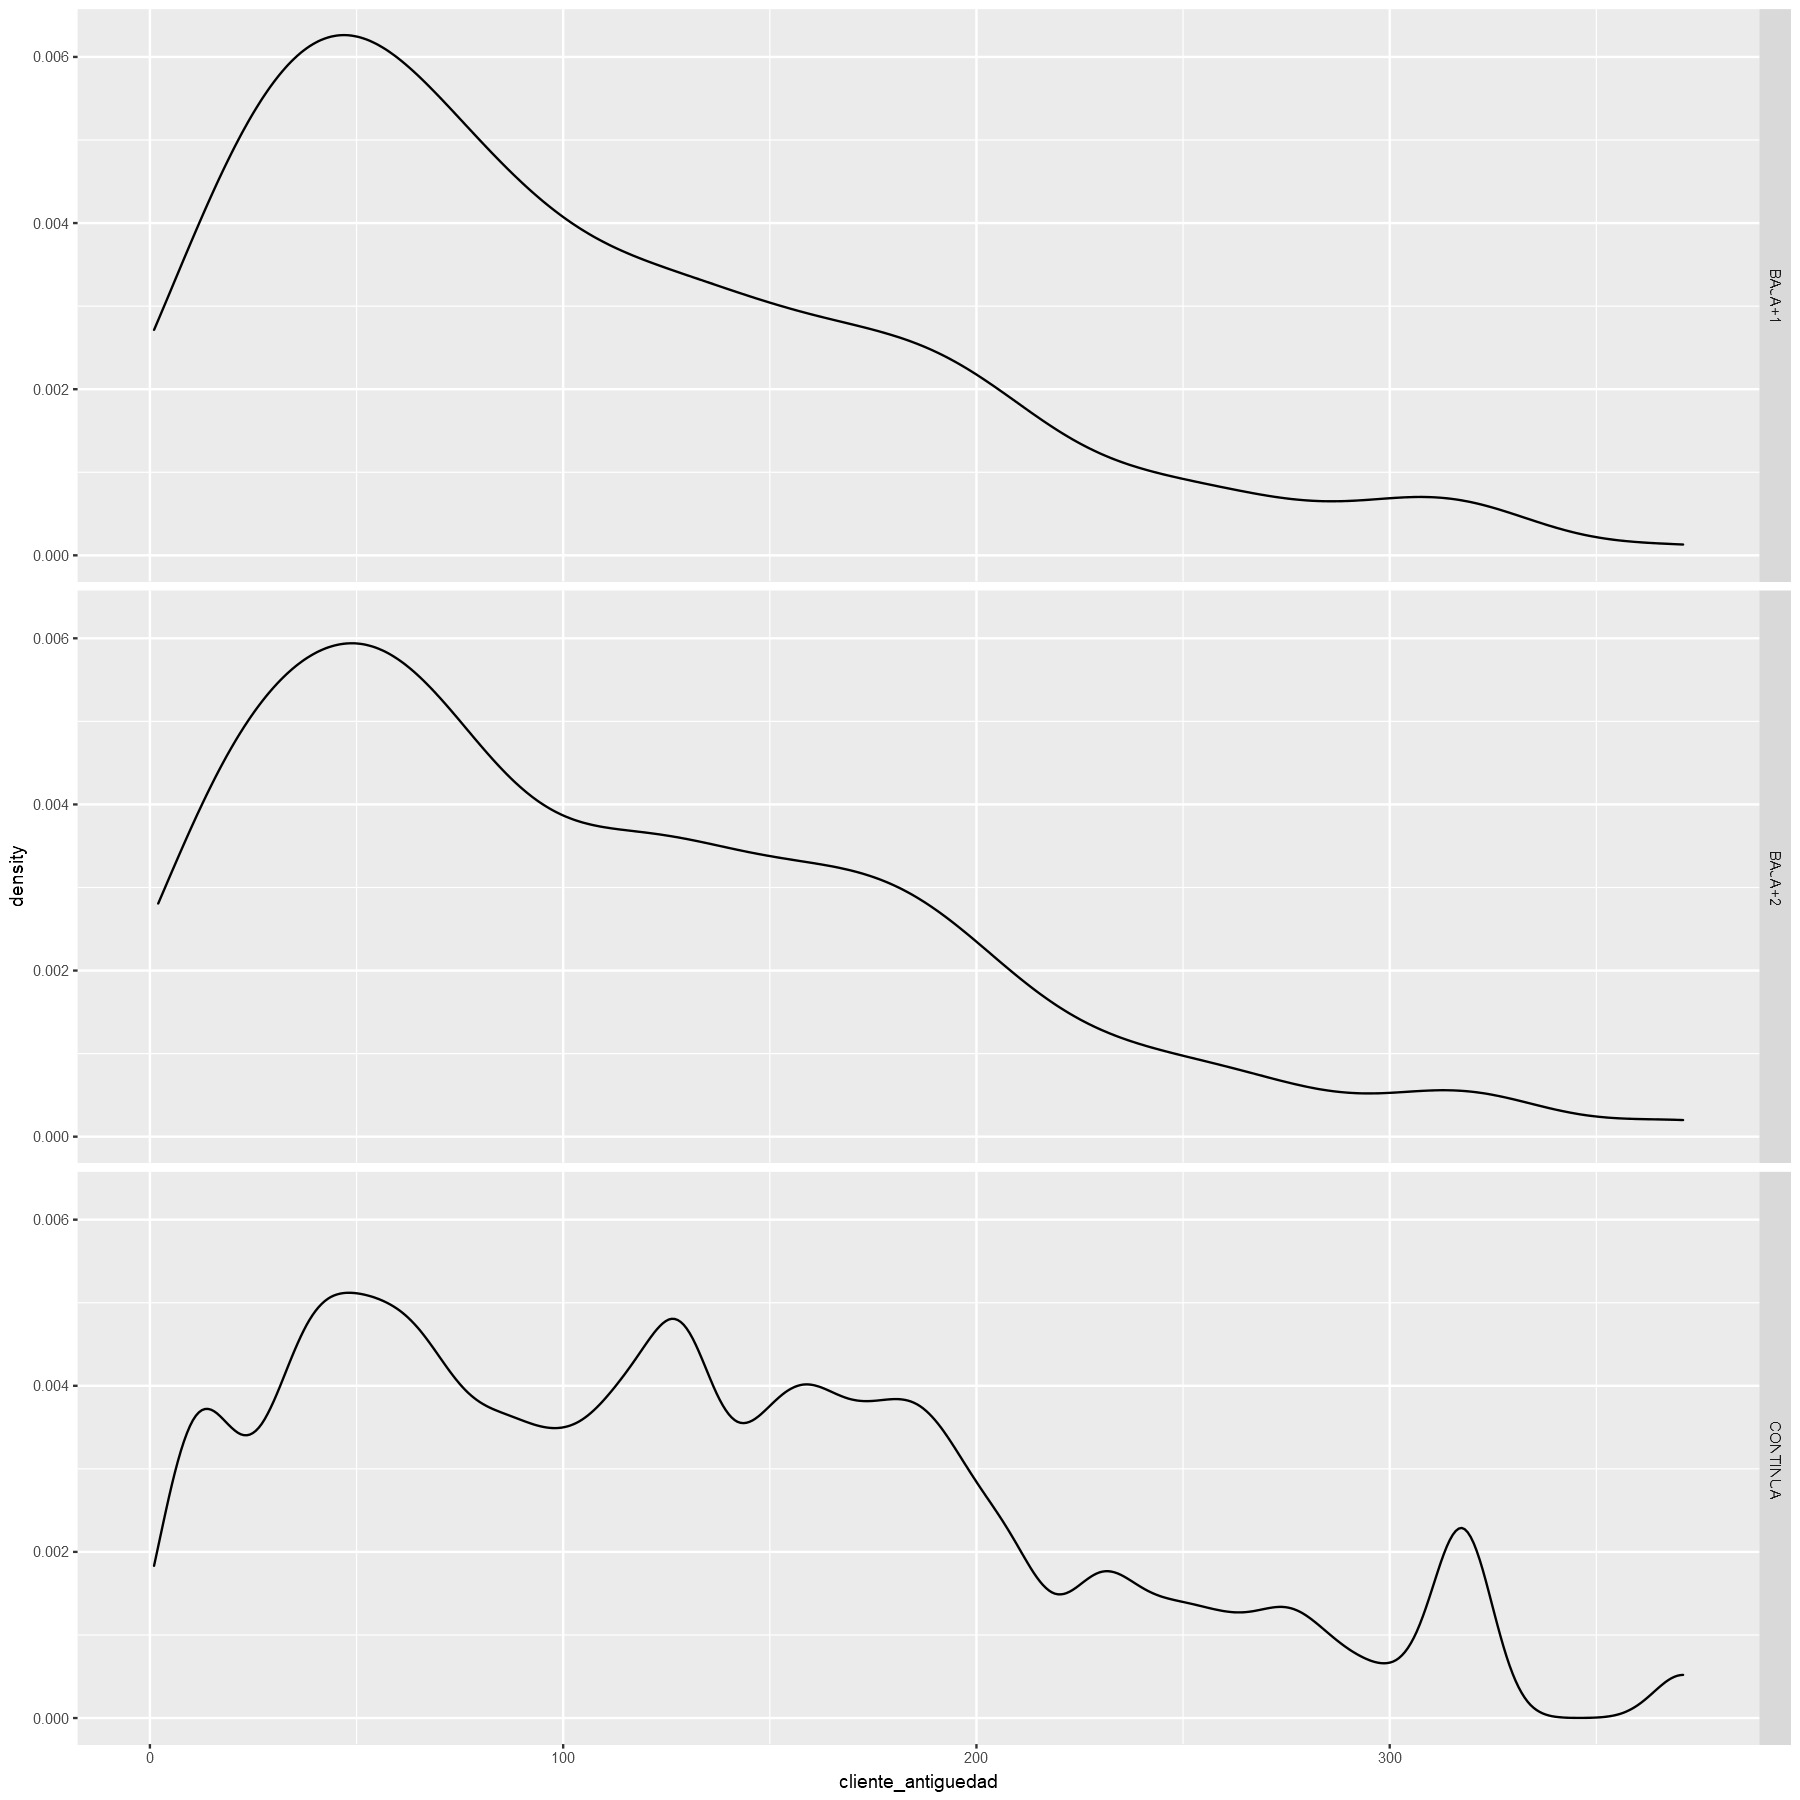

In [30]:
campo <- "cliente_antiguedad"
ggplot(dataset, aes_string(x = campo)) +
    geom_density(trim = TRUE, na.rm = TRUE) +
    facet_grid("clase_ternaria~ .")